<a href="https://colab.research.google.com/github/talitmr/VAE_GAN/blob/main/GAN_with_FC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Fully Connected Model for GAN

In [ ]:
import torch, torchvision
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

from torch.autograd import Variable
def torch_imshow(img):
    img = img[0]
    plt.imshow(img.cpu().numpy())
    plt.show()
    

class GANVisualizer:
    '''
    This class is a utility for visualizing
    generator samples using fixed latent vector to
    track the training of a GAN.
    '''
    def __init__(self):
        self.z = torch.randn(16, 100).cuda()
    
    def visualize(self, generator):
        with torch.no_grad():
            imgs = generator(self.z)
            fig, axes = plt.subplots(4, 4, figsize=(15, 15))
            for n in range(16):
                axis_row = n // 4
                axis_col = n % 4
                
                subplot = axes[axis_row, axis_col] 
                subplot.axis('off')
                img = subplot.imshow(imgs[n].cpu().reshape(28, 28))
                img.set_cmap('gray')
        plt.show()

visualizer = GANVisualizer() 

In [ ]:
#Create dataset and dataloader
BATCH_SIZE = 16

mnist = torchvision.datasets.MNIST('./', train=True, download=True, transform=torchvision.transforms.ToTensor())
train_dataloader = DataLoader(dataset=mnist, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
class FCNet(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.layers =  torch.nn.Sequential(
            torch.nn.Linear(input_dim,hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim,output_dim),
            torch.nn.Sigmoid()

        )
    def forward(self, x):
        x = self.layers(x)
        return x
        
        
generator     = FCNet(100, 256, 784)
discriminator = FCNet(784, 256, 1)


print('--Generator--')
dummy_input_g = torch.randn(16, 100)
dummy_output_g = generator(dummy_input_g)
print(generator)
print(f'Dummy input shape: {dummy_input_g.shape}')
print(f'Dummy output shape: {dummy_output_g.shape}')


print('--Discriminator--')
print(discriminator)
dummy_input_d = torch.randn(16, 784)
dummy_output_d = discriminator(dummy_input_d)
print(f'Dummy input shape: {dummy_input_d.shape}')
print(f'Dummy output shape: {dummy_output_d.shape}')

generator = generator.cuda()
discriminator = discriminator.cuda()

--Generator--
FCNet(
  (layers): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=784, bias=True)
    (3): Sigmoid()
  )
)
Dummy input shape: torch.Size([16, 100])
Dummy output shape: torch.Size([16, 784])
--Discriminator--
FCNet(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
Dummy input shape: torch.Size([16, 784])
Dummy output shape: torch.Size([16, 1])


In [ ]:
# Define an optimizer for both generator and discriminator

######################
g_optimizer = torch.optim.Adam(params=generator.parameters(), lr=0.00001) 
d_optimizer = torch.optim.Adamax(params=discriminator.parameters(), lr=0.00001)
#####################

In [ ]:
## Define loss function for GAN suited for the networks you defined

loss_fn = torch.nn.BCELoss()


In [ ]:
d_ones = Variable(torch.ones((16,1))).cuda()
d_zeros = Variable(torch.zeros((16,1))).cuda()

Epoch: 1


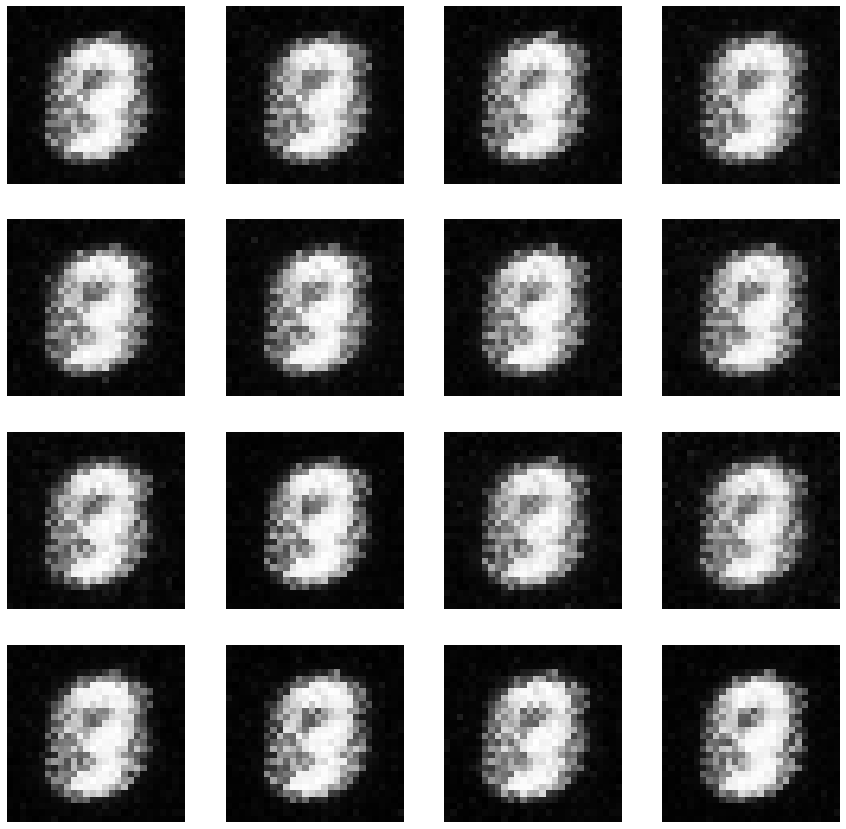

Epoch: 2


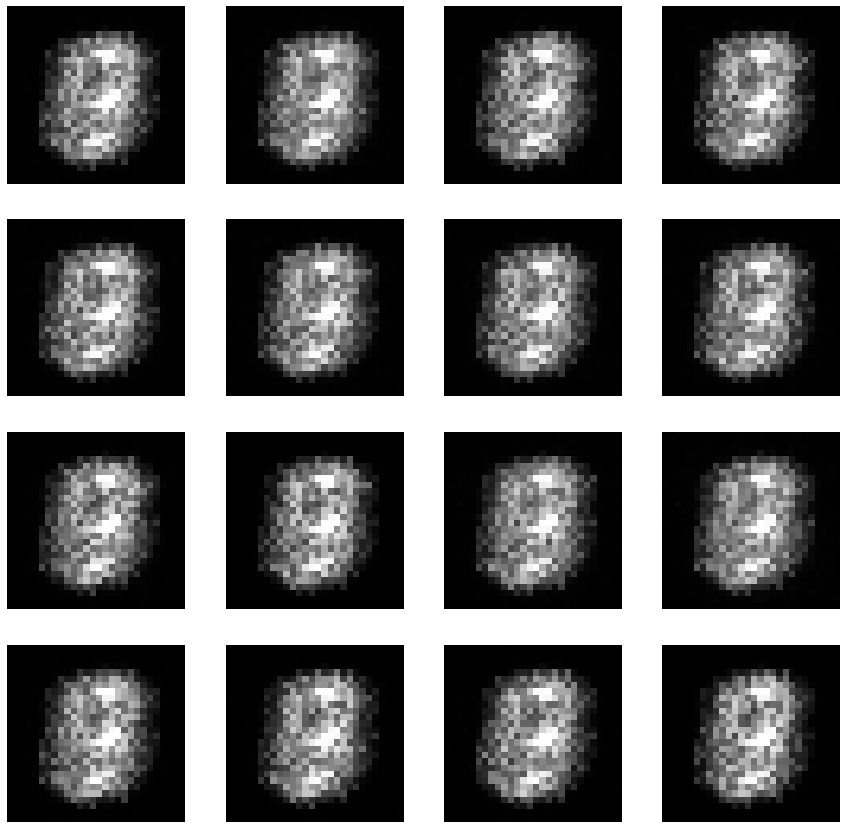

Epoch: 3


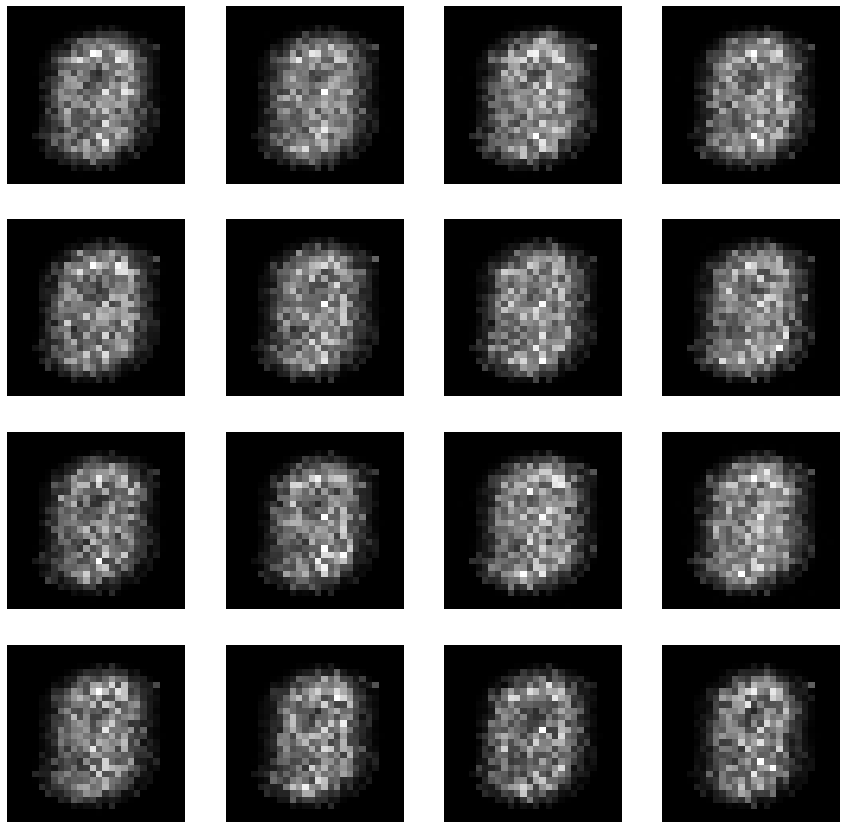

Epoch: 4


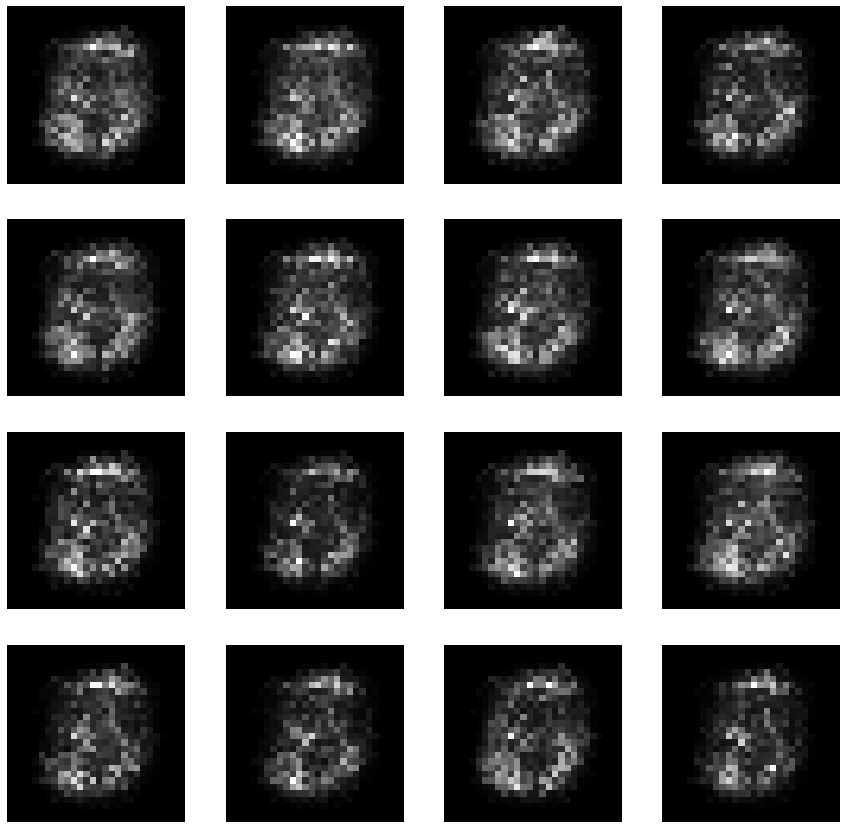

Epoch: 5


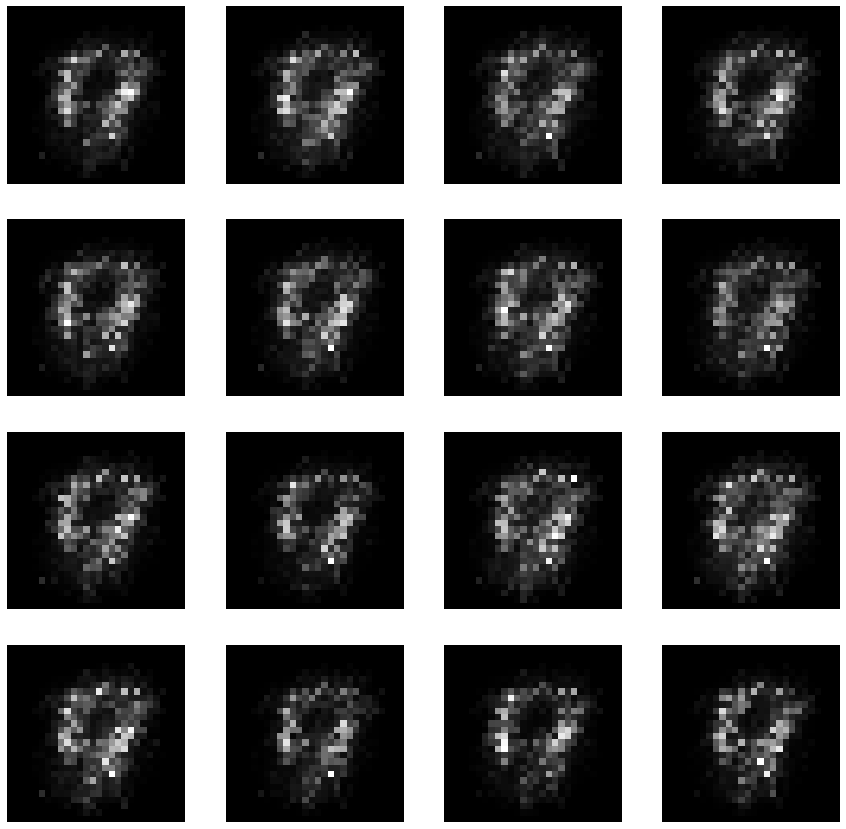

Epoch: 6


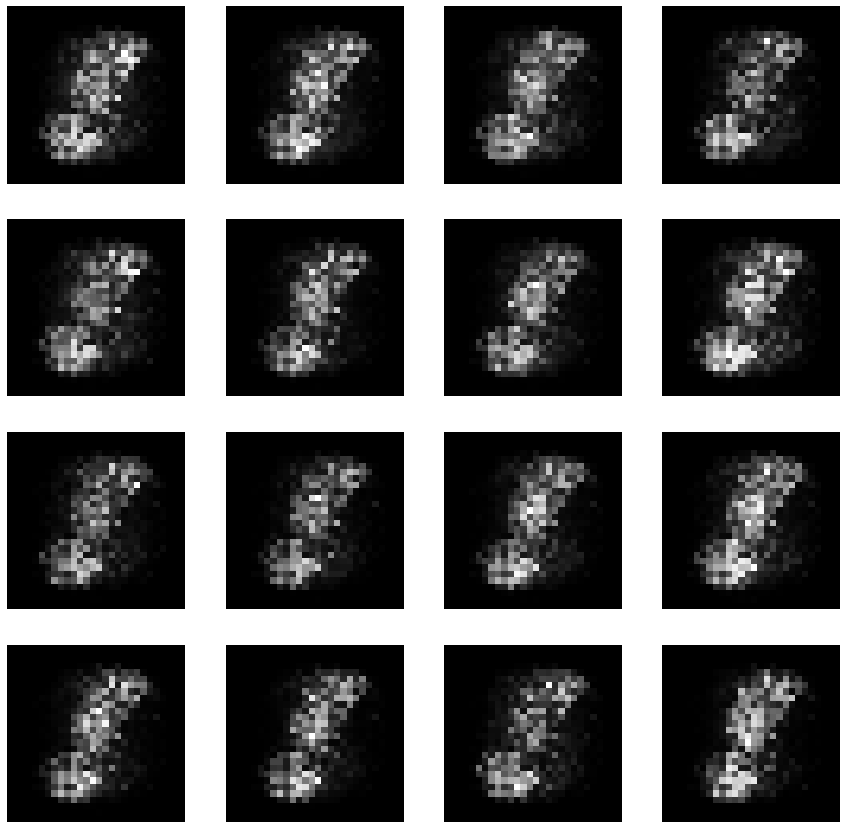

Epoch: 7


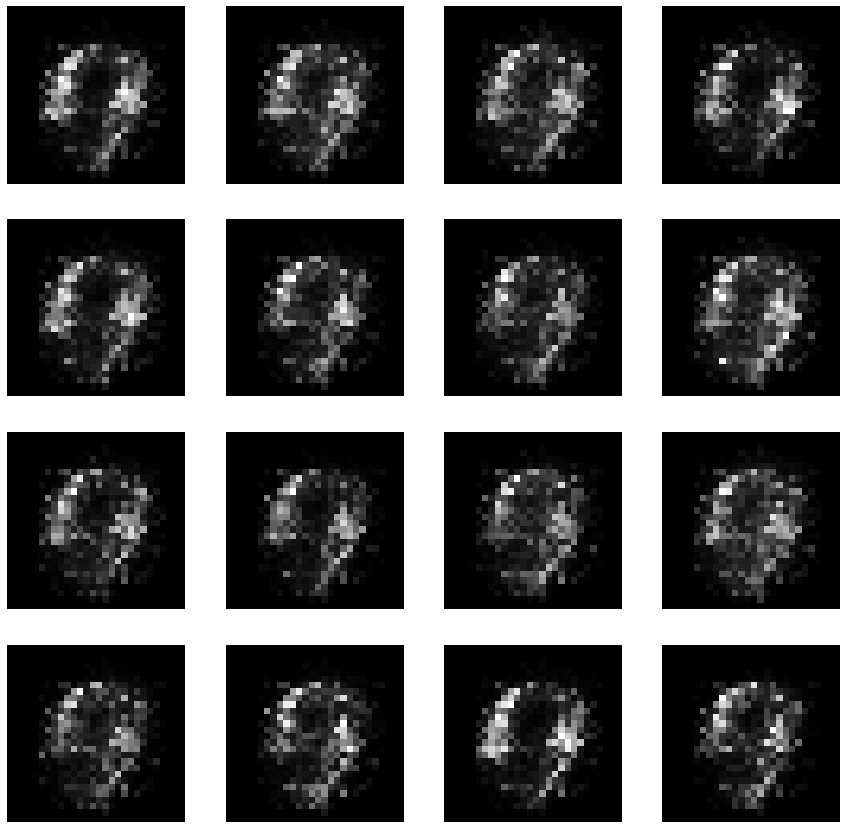

Epoch: 8


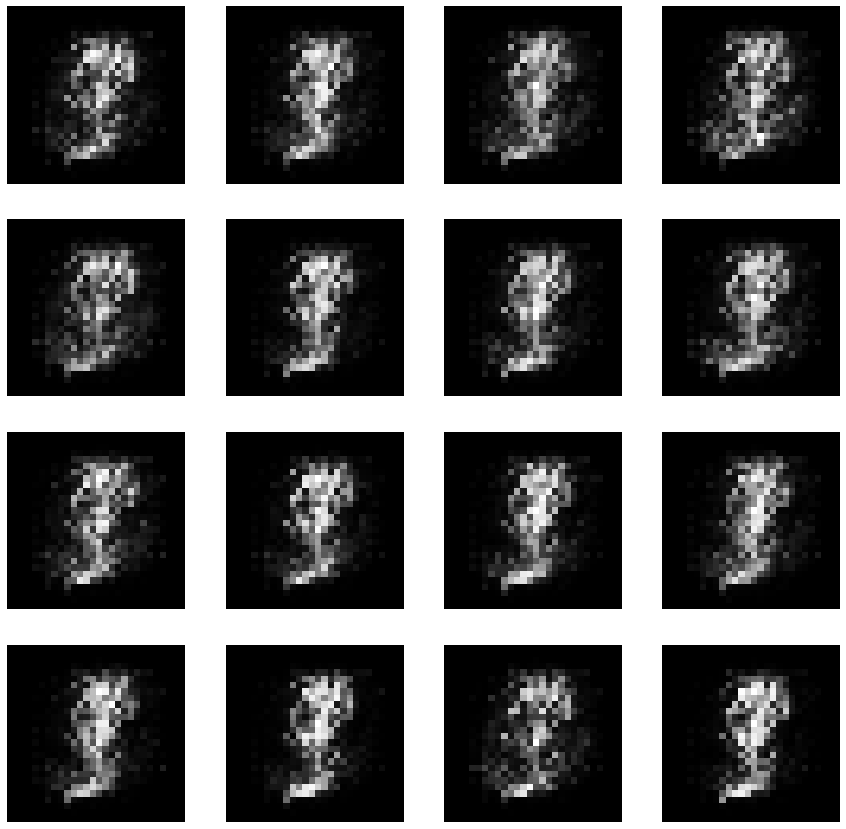

Epoch: 9


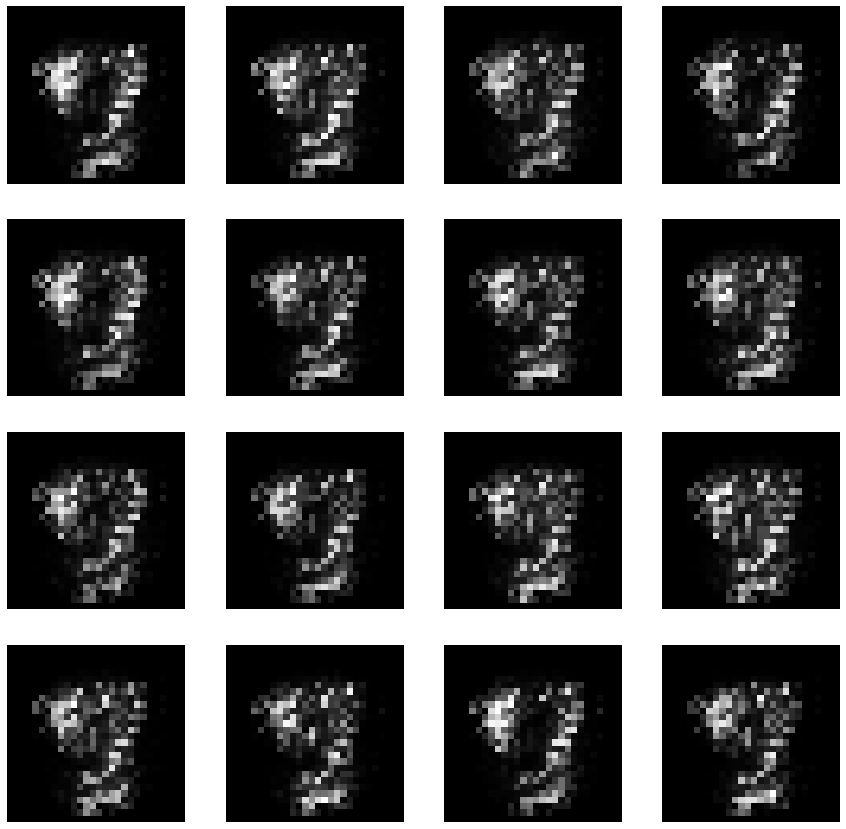

Epoch: 10


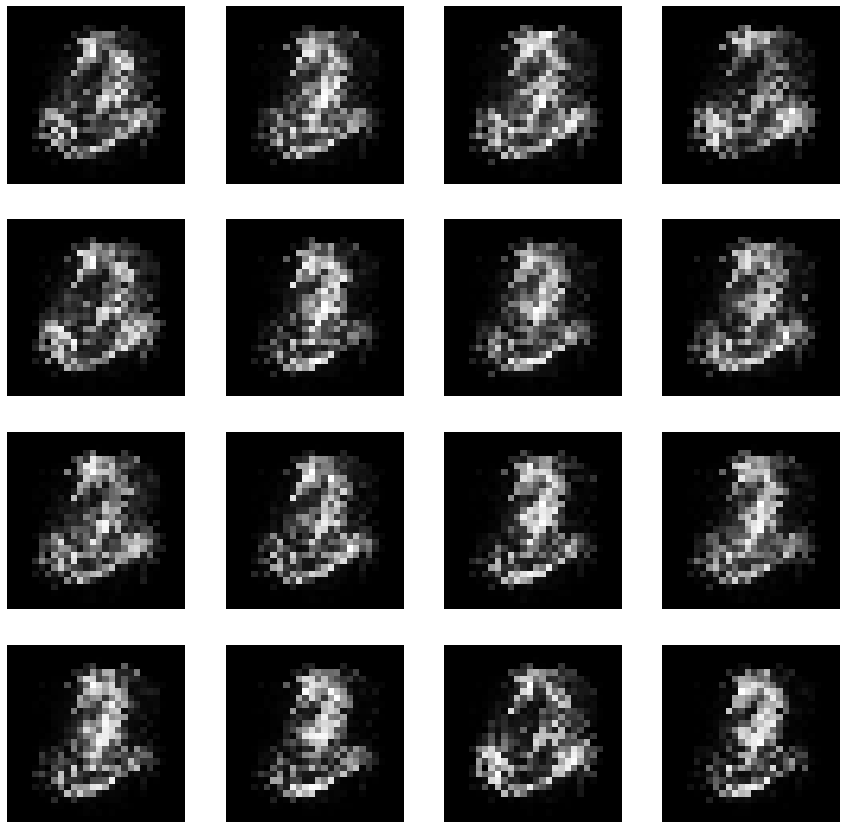

Epoch: 11


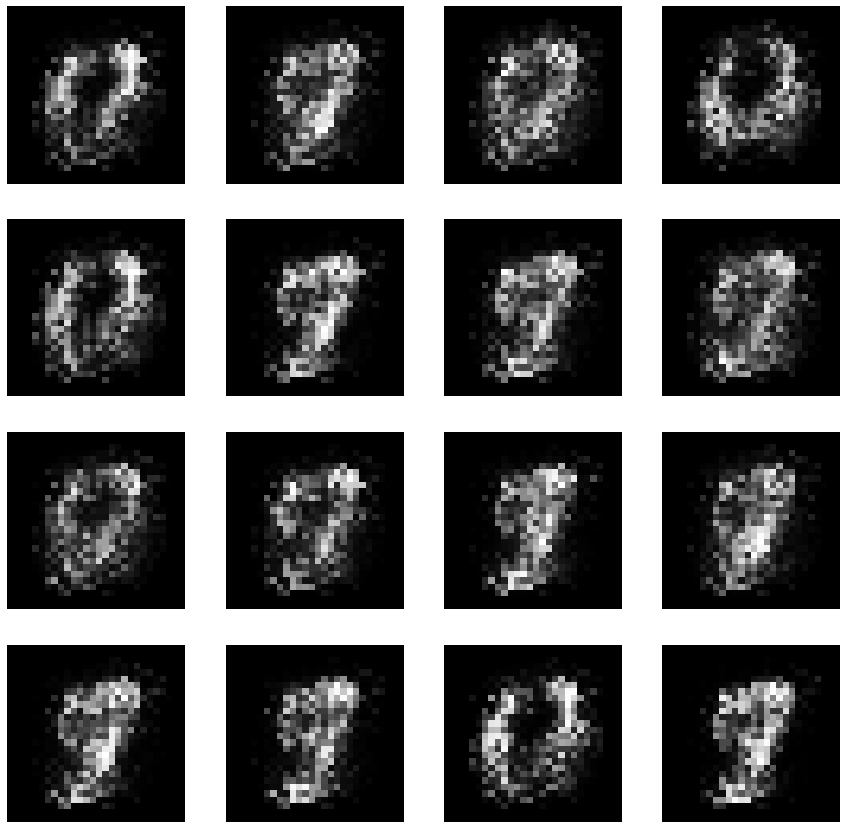

Epoch: 12


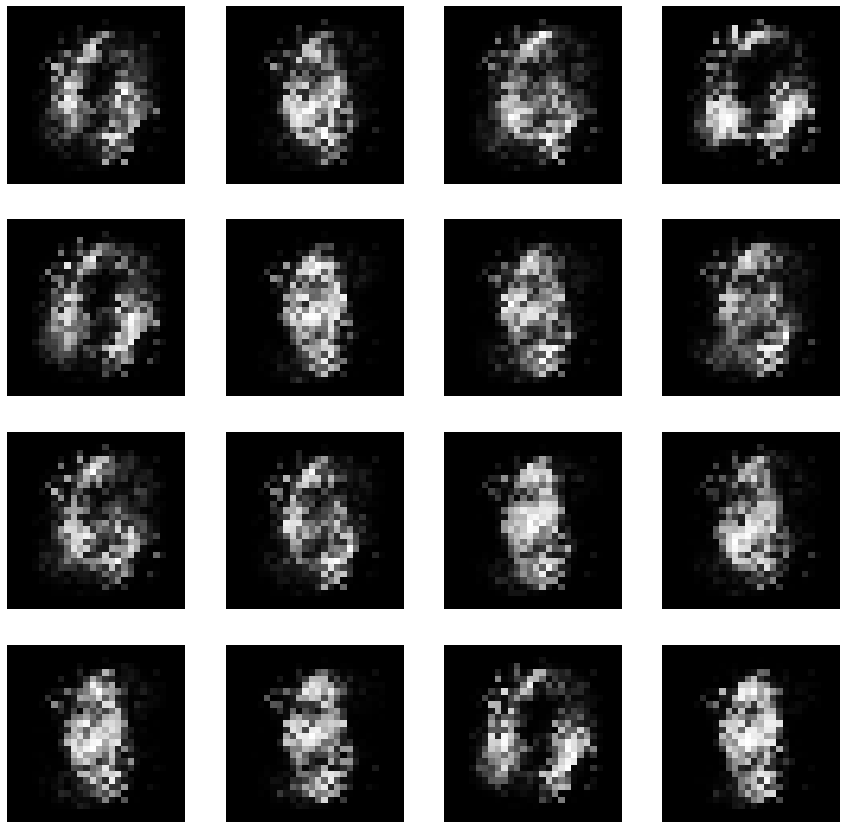

Epoch: 13


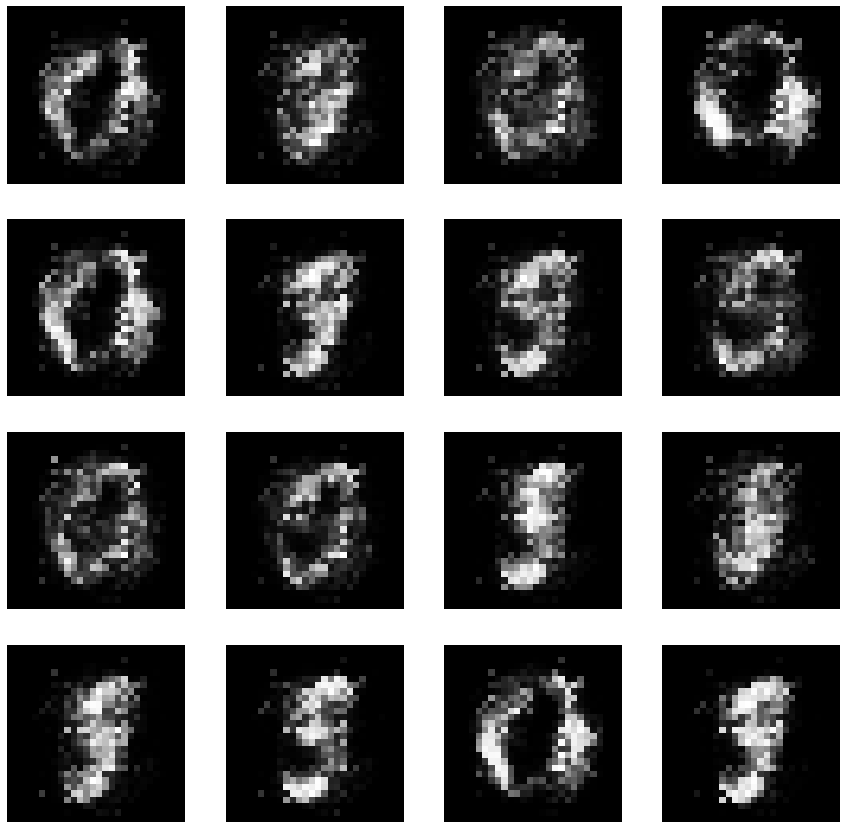

Epoch: 14


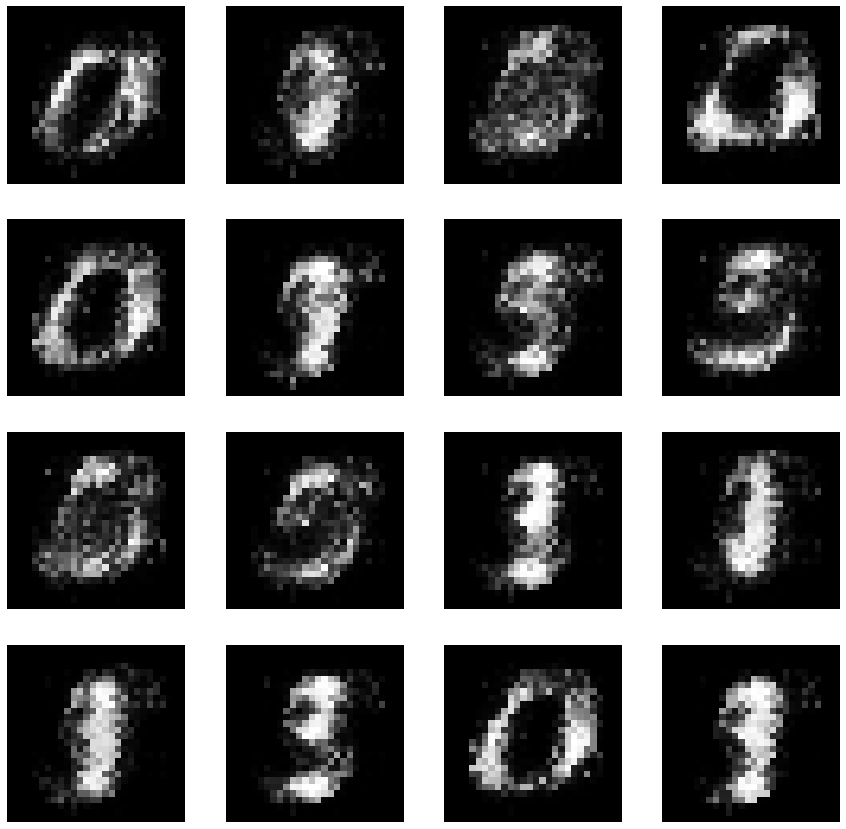

Epoch: 15


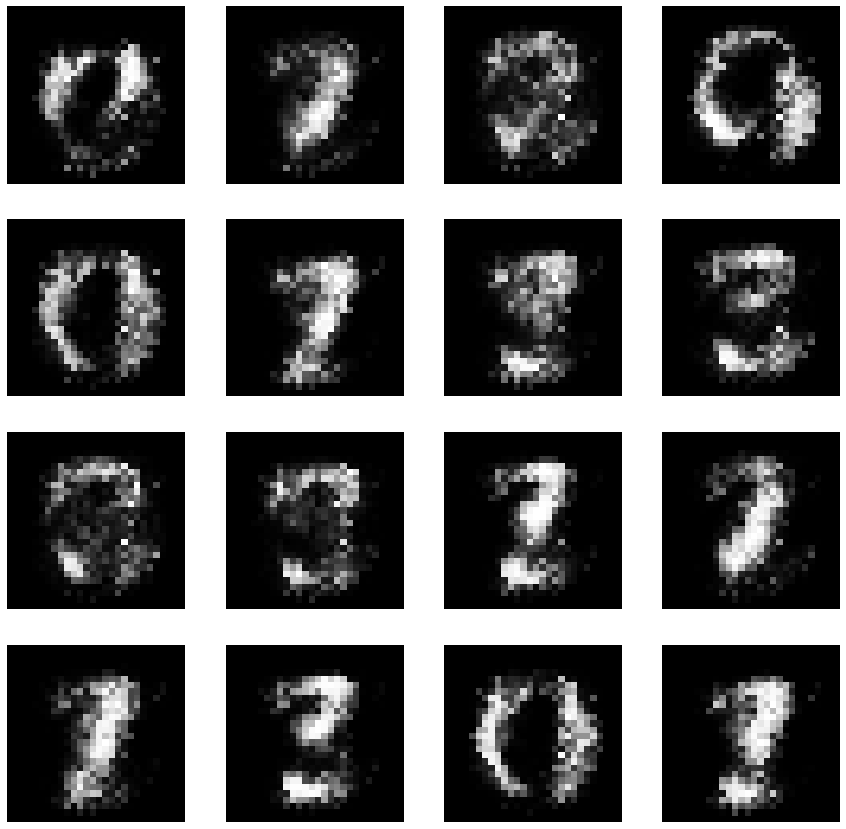

Epoch: 16


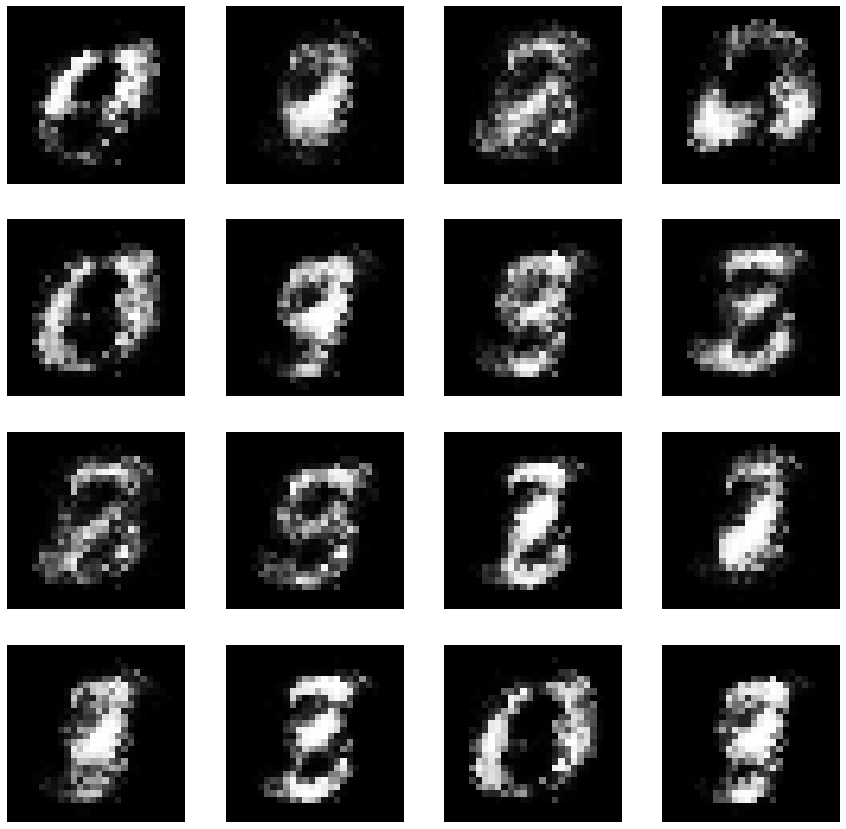

Epoch: 17


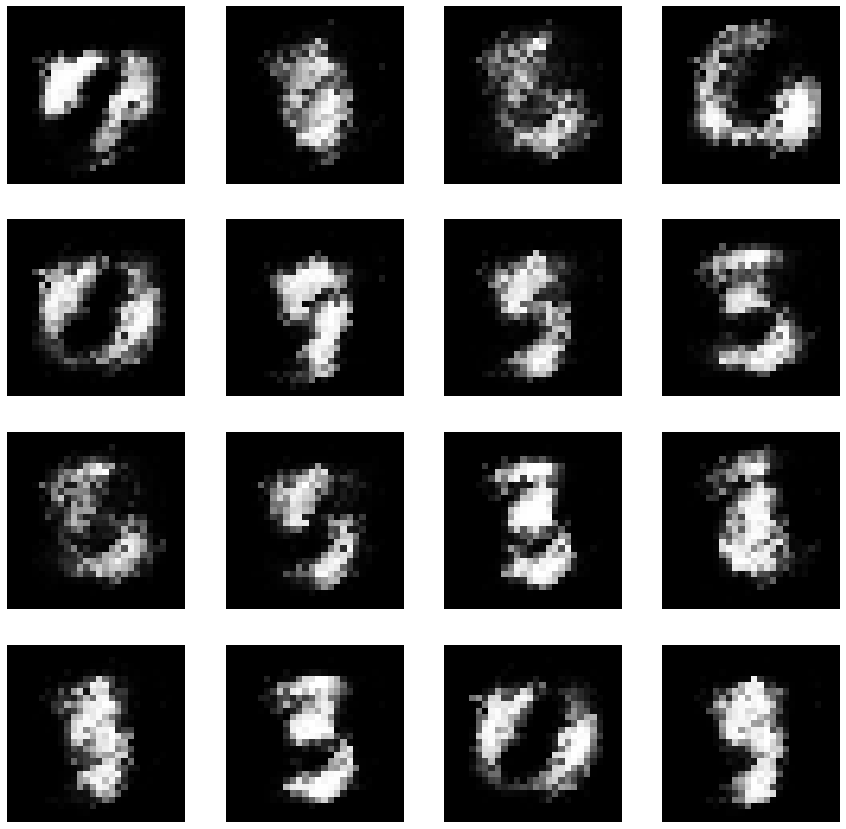

Epoch: 18


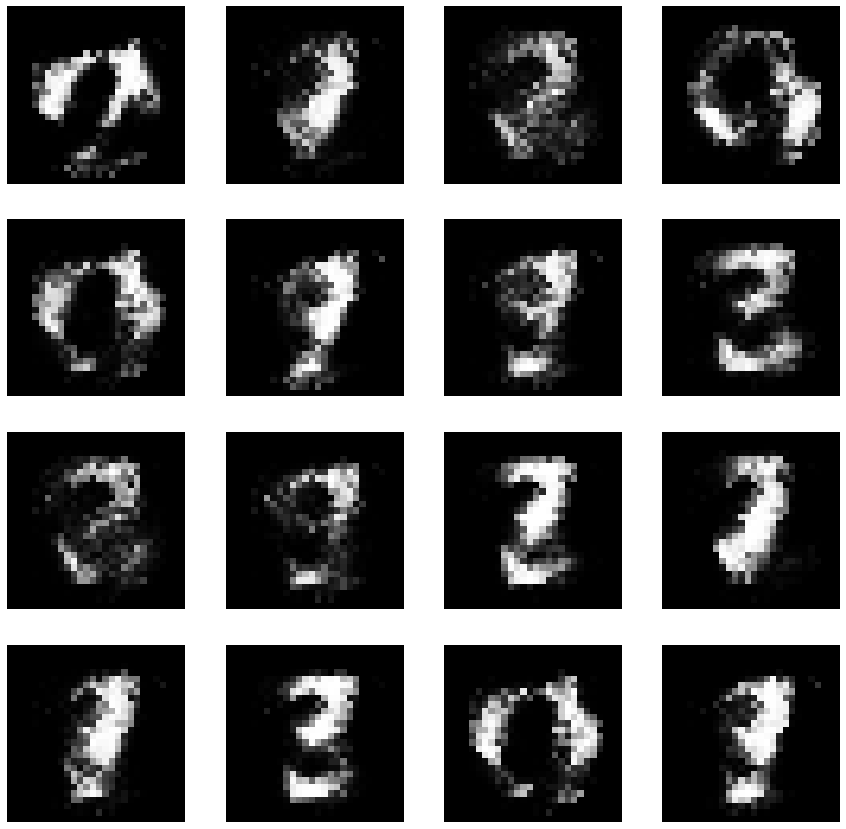

Epoch: 19


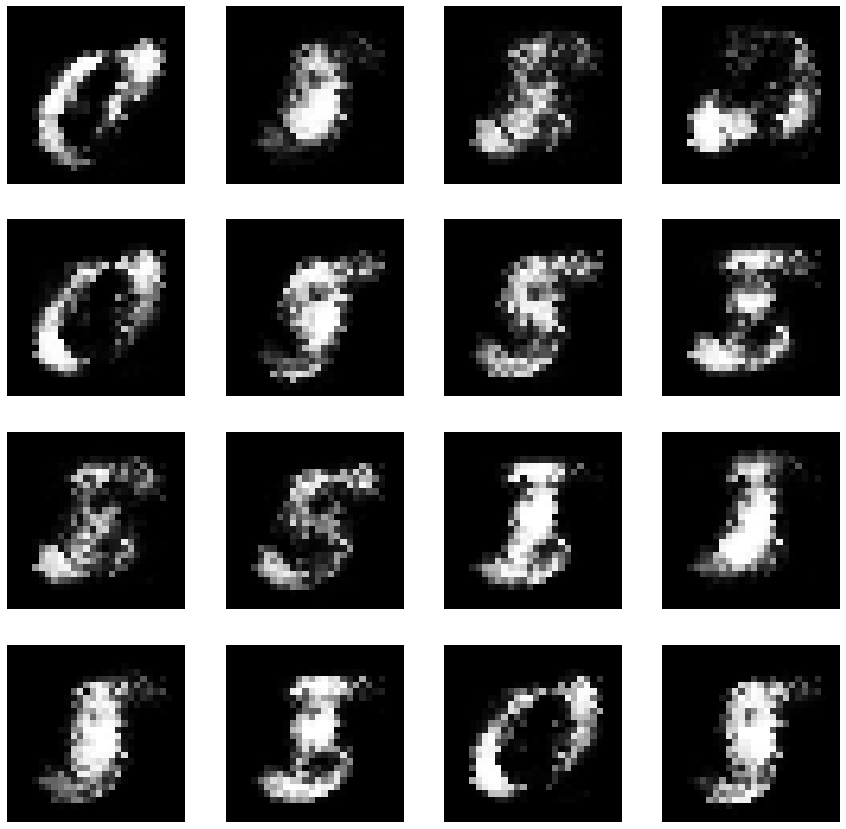

Epoch: 20


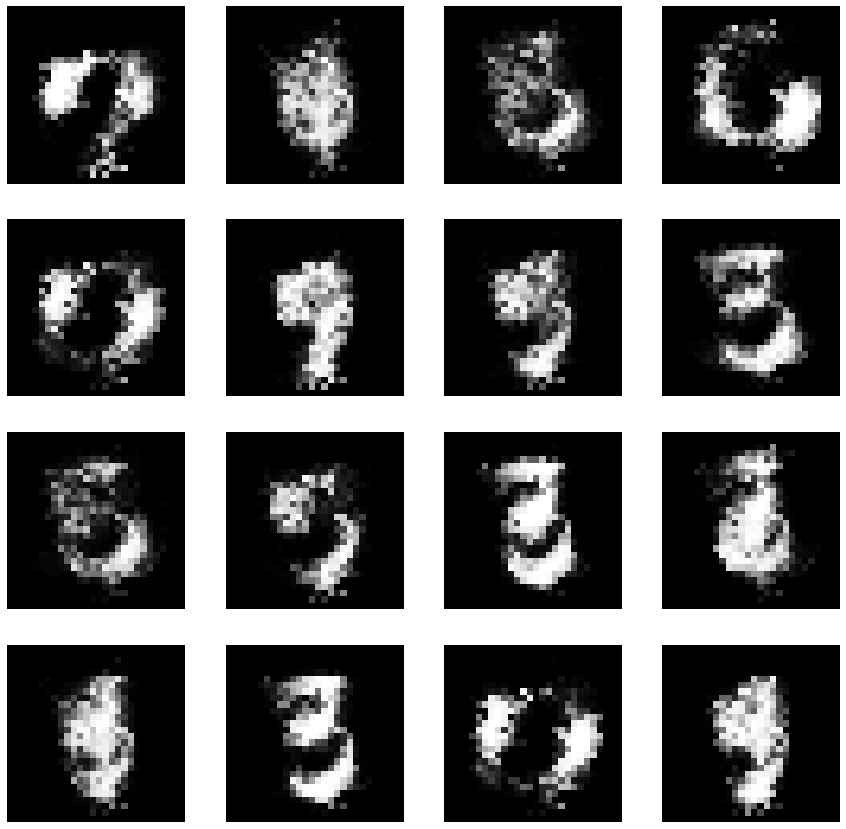

In [ ]:
for epoch in range(20):
    print(f'Epoch: {epoch + 1}')
    
    for iteration, (real_imgs, labels) in enumerate(train_dataloader):
        real_imgs = real_imgs.reshape(-1, 784).cuda()
        z = torch.randn(BATCH_SIZE, 100).cuda()
        
        
        ## train generator 1 step
        
        g_optimizer.zero_grad()
        g_output = generator(z)
        gd_output = discriminator(g_output)
        g_loss = loss_fn(gd_output,d_ones)
        g_loss.backward()
        g_optimizer.step()
        ## FILL HERE

        #train discriminator 1 step
        z = torch.randn(BATCH_SIZE, 100).cuda()
        g_output = generator(z)
        d_optimizer.zero_grad()

        d_output_fake = discriminator(g_output)
        d_output_real = discriminator(real_imgs)

        d_loss_fake = loss_fn(d_output_fake, d_zeros)
        d_loss_real = loss_fn(d_output_real, d_ones)
        d_loss = (d_loss_fake + d_loss_real)/2

        d_loss.backward()
        d_optimizer.step()
        
        
        # FILL HERE
    # Visualize generator samples after the epoch
    visualizer.visualize(generator)
